### Load Neccessary python Libraries

In [1]:
#os.chdir('../scripts/')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from textblob import TextBlob
#import spacy 
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# Add the scripts folder to the system path so we can import time_series.py
import sys
import os

# for a folder that contain scripts for modularity 
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src'))
import path

from load_data import CSVData
from Data_visulization import EDA
from financial import FinancialAnalysis



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Specter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Specter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Loading News Dataset
folder_path = path.get_path_news()
file_load = CSVData(folder_path)
df = file_load.load_csv_file()
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
# removing Unnamed column from the dataset
df= df.loc[:,~df.columns.str.contains("Unnamed")]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1048575 non-null  object
 1   url        1048575 non-null  object
 2   publisher  1048575 non-null  object
 3   date       1048575 non-null  object
 4   stock      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


### Descriptive Statistics 
 ### Obtaining basic statistics for textual lengths.

In [5]:
# Calculate headline length
df['headline_length'] = df['headline'].str.len()
df['headline_length']

0           39
1           42
2           29
3           44
4           87
          ... 
1048570     58
1048571    131
1048572    123
1048573     92
1048574     46
Name: headline_length, Length: 1048575, dtype: int64

In [6]:
# Descriptive statistics for headline length
headline_stats = df['headline_length'].describe().T
print("Descriptive Statistics for Headline Length:")
print(headline_stats)

Descriptive Statistics for Headline Length:
count    1.048575e+06
mean     7.300076e+01
std      4.029646e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [7]:
# Count articles by publisher
publisher_counts = df['publisher'].value_counts()

print("\nTop Publishers and their Article Counts:")
print(publisher_counts)


Top Publishers and their Article Counts:
publisher
Paul Quintaro                 168435
Lisa Levin                    139785
Benzinga Newsdesk             111281
Charles Gross                  72892
Monica Gerson                  61374
                               ...  
Silvio Tavares                     1
Matthew Boesler                    1
Bull Market Bear                   1
vic@forextraininggroup.com         1
Ryan Smith                         1
Name: count, Length: 984, dtype: int64


In [4]:
# Analyze Publication Dates

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Drop rows with invalid or missing dates
df = df.dropna(subset=['date'])

# Group articles by publication date
daily_articles = df.groupby(df['date'].dt.date).size()

print(f"\nNumber of Articles Published by Date: {daily_articles}")


Number of Articles Published by Date: date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     18
2020-06-08    564
2020-06-09    581
2020-06-10    552
2020-06-11    302
Length: 2418, dtype: int64


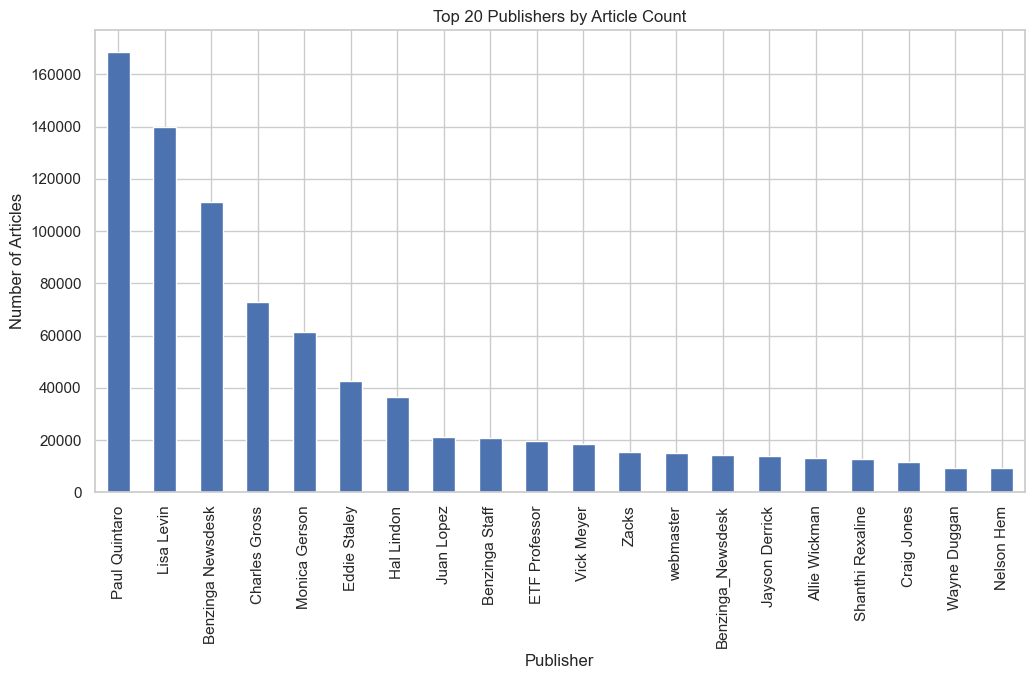

In [23]:
# Plot articles by publisher
publisher_counts.head(20).plot(kind='bar', title='Top 20 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

In [9]:
# Drop rows where 'date' is NaT and explicitly create a copy
df1 = df.dropna(subset=['date']).copy()

# Extract additional date components for analysis
df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month
df1['day'] = df1['date'].dt.day

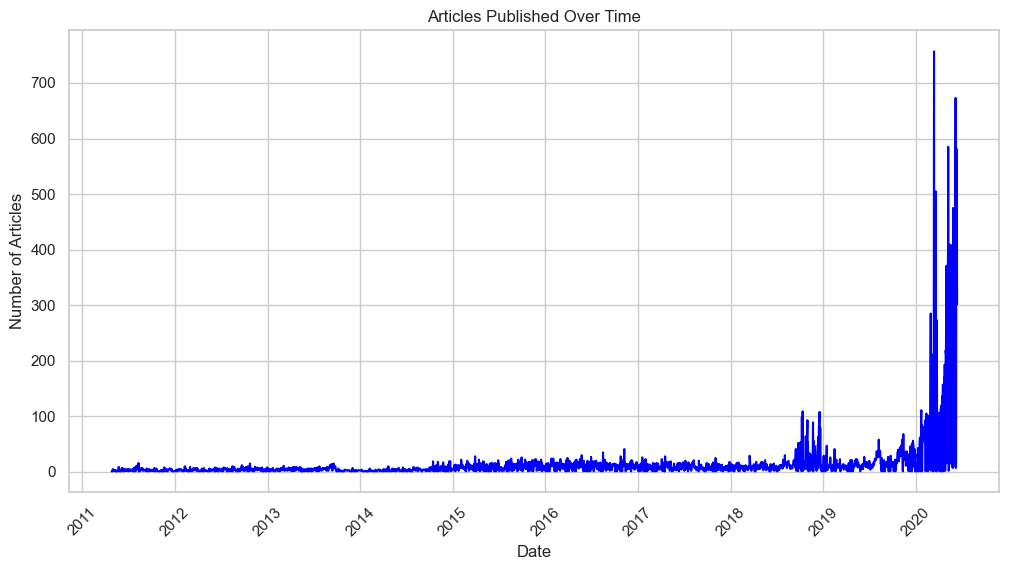

In [10]:
# Count the number of articles per day
daily_counts = df1['date'].dt.date.value_counts().sort_index()

# Plot the trend of articles over time
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line', color='blue')
plt.title("Articles Published Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

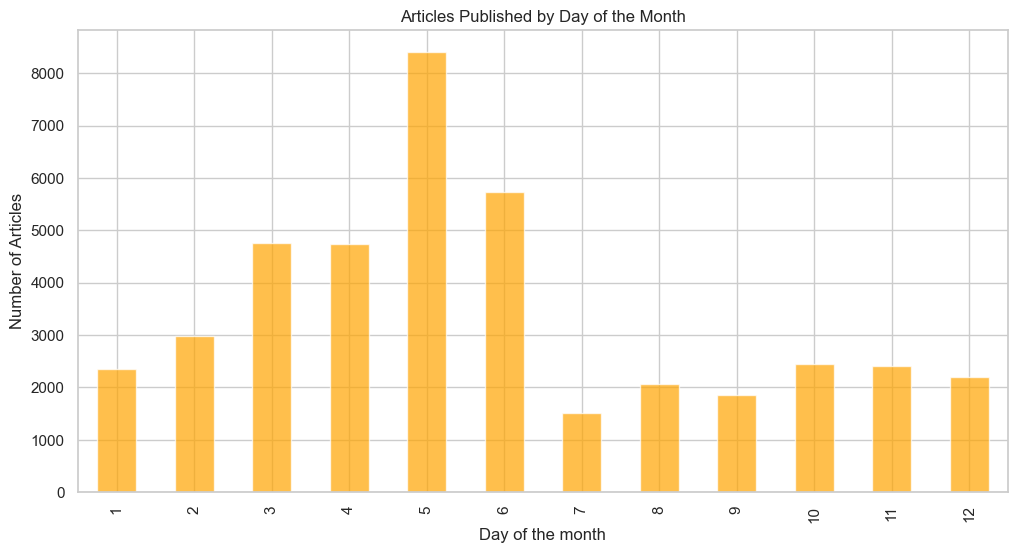

In [11]:
 # Count articles by day of the 'month'
monthly_counts = df1['month'].value_counts().sort_index()

# Plot the frequency of articles by day of the 'month'
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Articles Published by Day of the Month")
plt.xlabel("Day of the month")
plt.ylabel("Number of Articles")
plt.show()
      

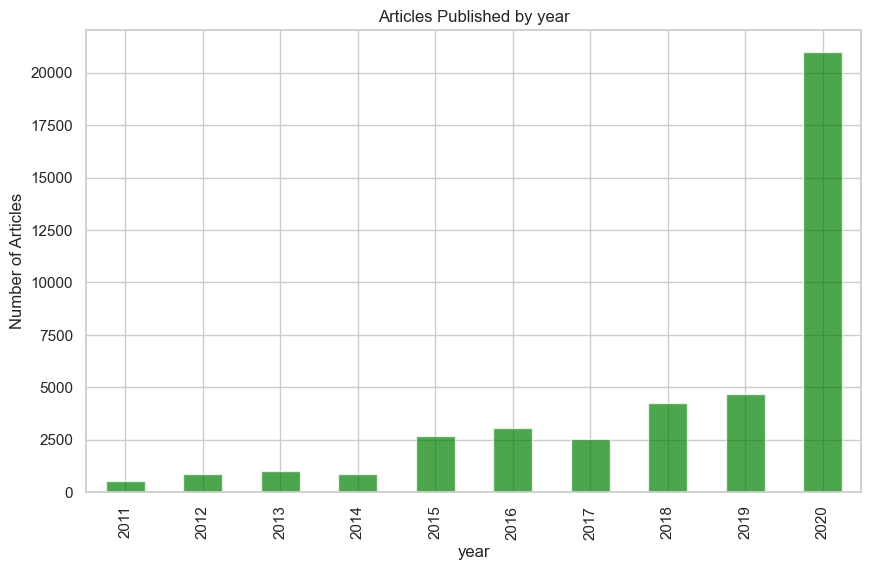

In [12]:
# Count articles by year
yearly_counts = df1['year'].value_counts().sort_index()

# Plot the frequency of articles by year
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='green', alpha=0.7)
plt.title("Articles Published by year")
plt.xlabel("year")
plt.ylabel("Number of Articles")
plt.show()

### Sentiment Analysis
Sentiment analysis is a natural language processing (NLP) technique used to determine the emotional tone behind a piece of text. It categorizes the text into positive, negative, or neutral sentiments. This method is widely used for analyzing opinions in reviews, social media, news articles, and more.

 To perform sentiment analysis on the News dataset using TextBlob for simplicity. TextBlob provides a polarity score ranging from -1 (negative) to 1 (positive), and we can categorize sentiment as positive, negative, or neutral based on these scores.

In [3]:
# Perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['headline'].apply(get_sentiment)

# Count the number of articles for each sentiment
sentiment_counts = df['sentiment'].value_counts()
print(f"\nSentiment Analysis Results: {sentiment_counts}")


Sentiment Analysis Results: sentiment
Neutral     694336
Positive    258964
Negative     95275
Name: count, dtype: int64


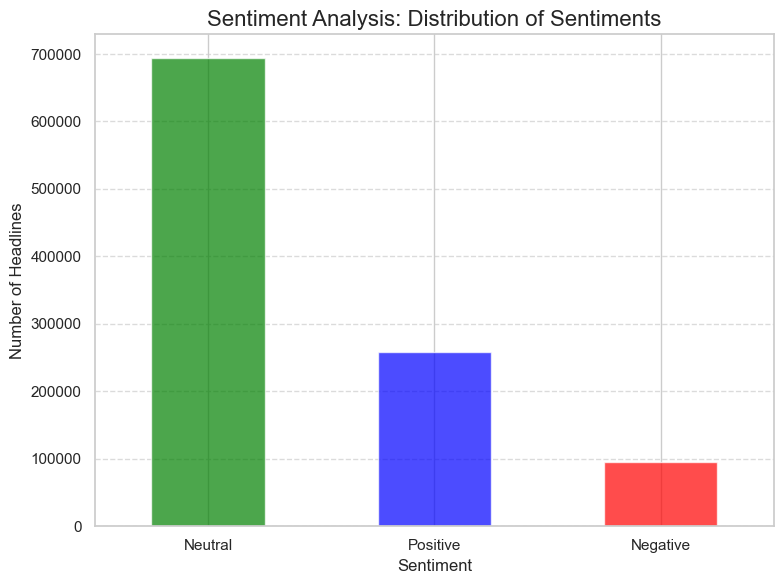

In [7]:
# Bar chart for sentiment analysis
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'], alpha=0.7)

# Customize the plot
plt.title('Sentiment Analysis: Distribution of Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Headlines', fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Define stopwords
stop_words = set(stopwords.words('english'))

# Tokenize and extract keywords
def extract_keywords(text):
    tokens = word_tokenize(text)
    keywords = [word.lower() for word in tokens if word.is_alpha() and word.lower() not in stop_words]
    return keywords

# Apply the function to the 'headline' column
df['keywords'] = df['headline'].apply(extract_keywords)

In [16]:
# Count most common keywords
all_keywords = [keyword for keywords in df['keywords'] for keyword in keywords]
common_keywords = Counter(all_keywords).most_common(20)

# Print the top 20 keywords
print(f"\nTop 20 Keywords: {common_keywords}")


# Time Series Analysis:

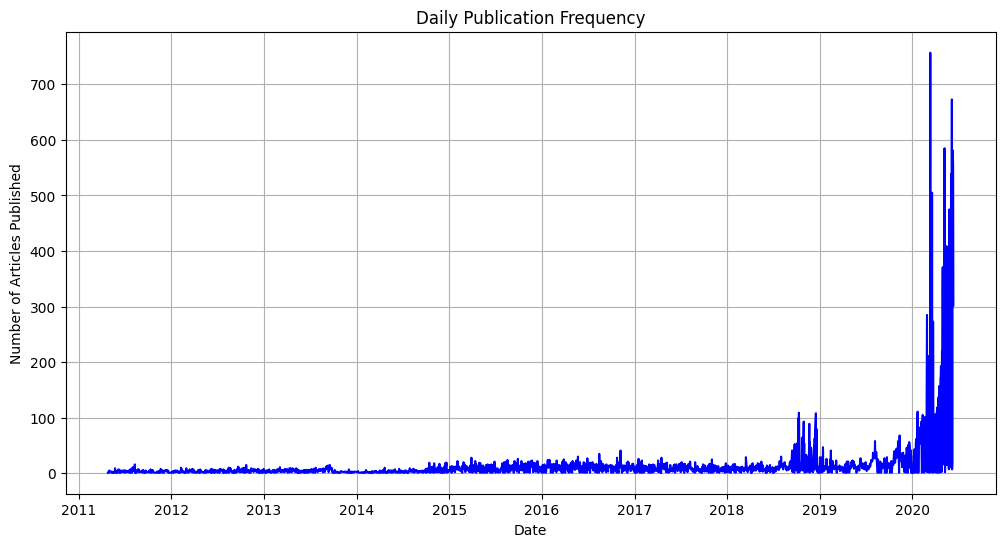

In [19]:
# 1. Analyze DAILY trends
# Extract the date (without time) and count articles published per day
df['publication_date'] = df['date'].dt.date
daily_trend = df.groupby('publication_date').size()

# Plot daily publication trends
plt.figure(figsize=(12, 6))
daily_trend.plot(kind='line', color='blue')
plt.title('Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles Published')
plt.grid(True)
plt.show()

C:\Users\Specter\AppData\Local\Temp\ipykernel_29808\1096565554.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M')  # Format: YYYY-MM


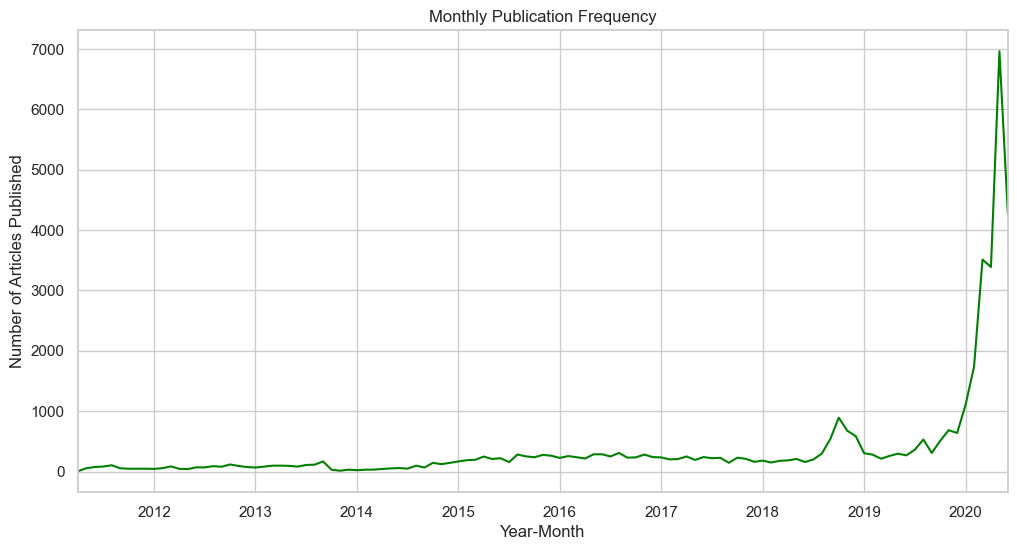

In [19]:
# 2. Analyze MONTHLY trends
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group data by year and month, and count articles
df['year_month'] = df['date'].dt.to_period('M')  # Format: YYYY-MM
monthly_trend = df.groupby('year_month').size()

# Plot monthly publication trends
plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line', color='green')
plt.title('Monthly Publication Frequency')
plt.xlabel('Year-Month')
plt.ylabel('Number of Articles Published')
plt.grid(True)
plt.show()

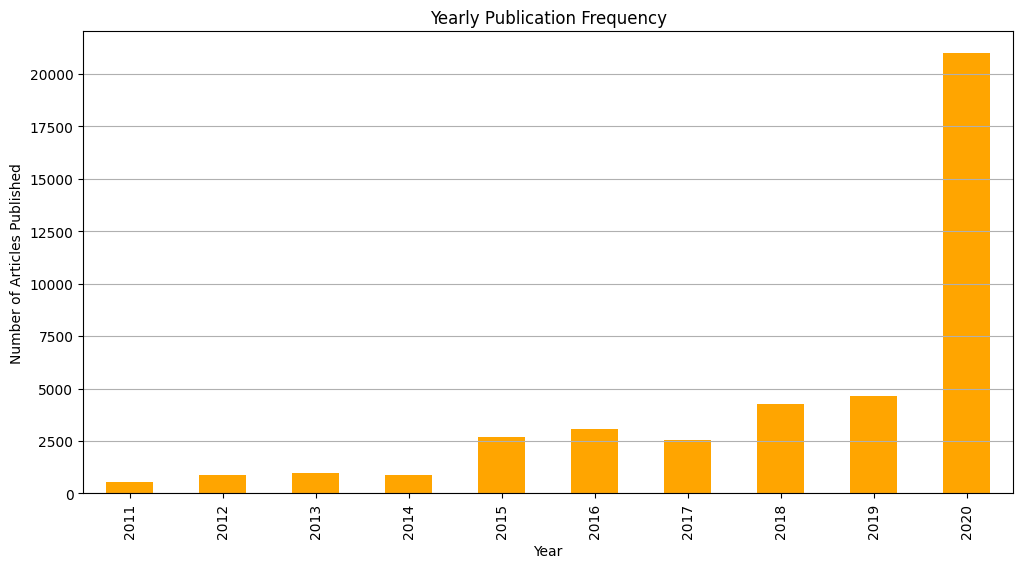

In [21]:
# 3. Analyze YEARLY trends
# Group data by year and count articles
df['year'] = df['date'].dt.year
yearly_trend = df.groupby('year').size()

# Plot yearly publication trends
plt.figure(figsize=(12, 6))
yearly_trend.plot(kind='bar', color='orange')
plt.title('Yearly Publication Frequency')
plt.xlabel('Year')
plt.ylabel('Number of Articles Published')
plt.grid(axis='y')
plt.show()

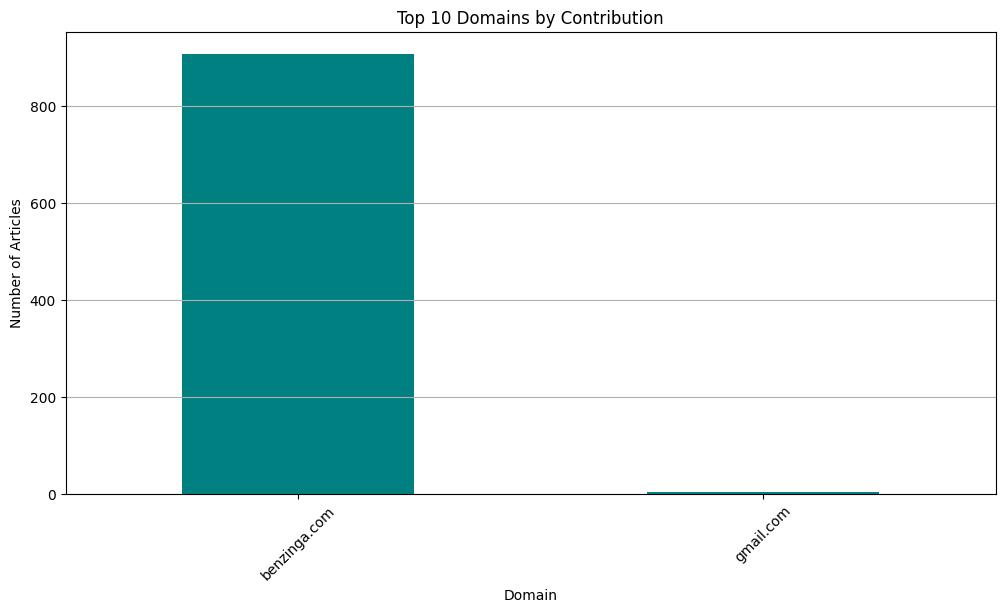

In [25]:
# Task 2: Identify unique domains if publishers contain email addresses
def extract_domain(publisher):
    if isinstance(publisher, str) and '@' in publisher:
        return publisher.split('@')[-1]
    return None

df['publisher_domain'] = df['publisher'].apply(extract_domain)
unique_domains = df['publisher_domain'].dropna().value_counts()

# Plot the top domains
plt.figure(figsize=(12, 6))
unique_domains.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Domains by Contribution')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Loading The Second Dataset on Stock market price

In [4]:
# Loading Stock Market data
folder_path = path.get_path_price()

# Create an instance of CSVLoader
csv_loader = CSVData(folder_path)

# Load CSV files
csv_loader.load_data_files()

# Merge the loaded dataframes
merged_df = csv_loader.merge_dataframes()

# Display the first few rows
merged_df.head() 

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [5]:
# Perform EDA for stock price
stock_price = EDA(merged_df)

In [6]:
# Basic Information and Structure of stoke price
stock_price.display_info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45428 entries, 0 to 45427
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          45428 non-null  object 
 1   Open          45428 non-null  float64
 2   High          45428 non-null  float64
 3   Low           45428 non-null  float64
 4   Close         45428 non-null  float64
 5   Adj Close     45428 non-null  float64
 6   Volume        45428 non-null  int64  
 7   Dividends     45428 non-null  float64
 8   Stock Splits  45428 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.1+ MB
None

Missing Values:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Dataset Shape: (45428, 9)


In [7]:
stock_price.stat_summary()


Statistical Summary (Numerical Features):
               Open          High           Low         Close     Adj Close  \
count  45428.000000  45428.000000  45428.000000  45428.000000  45428.000000   
mean      46.798370     47.397792     46.190101     46.810590     45.367891   
std       78.259474     79.277620     77.218532     78.274673     78.049554   
min        0.034896      0.035547      0.033333      0.034115      0.031291   
25%        0.690500      0.708000      0.673541      0.693604      0.585204   
50%       13.646101     13.827710     13.463250     13.644750     13.076301   
75%       47.242501     47.720626     46.628125     47.193626     44.768961   
max      542.349976    542.809998    528.359985    539.909973    539.909973   

             Volume     Dividends  Stock Splits  
count  4.542800e+04  45428.000000  45428.000000  
mean   2.177785e+08      0.000847      0.002499  
std    3.076645e+08      0.022527      0.155291  
min    0.000000e+00      0.000000      0.0000

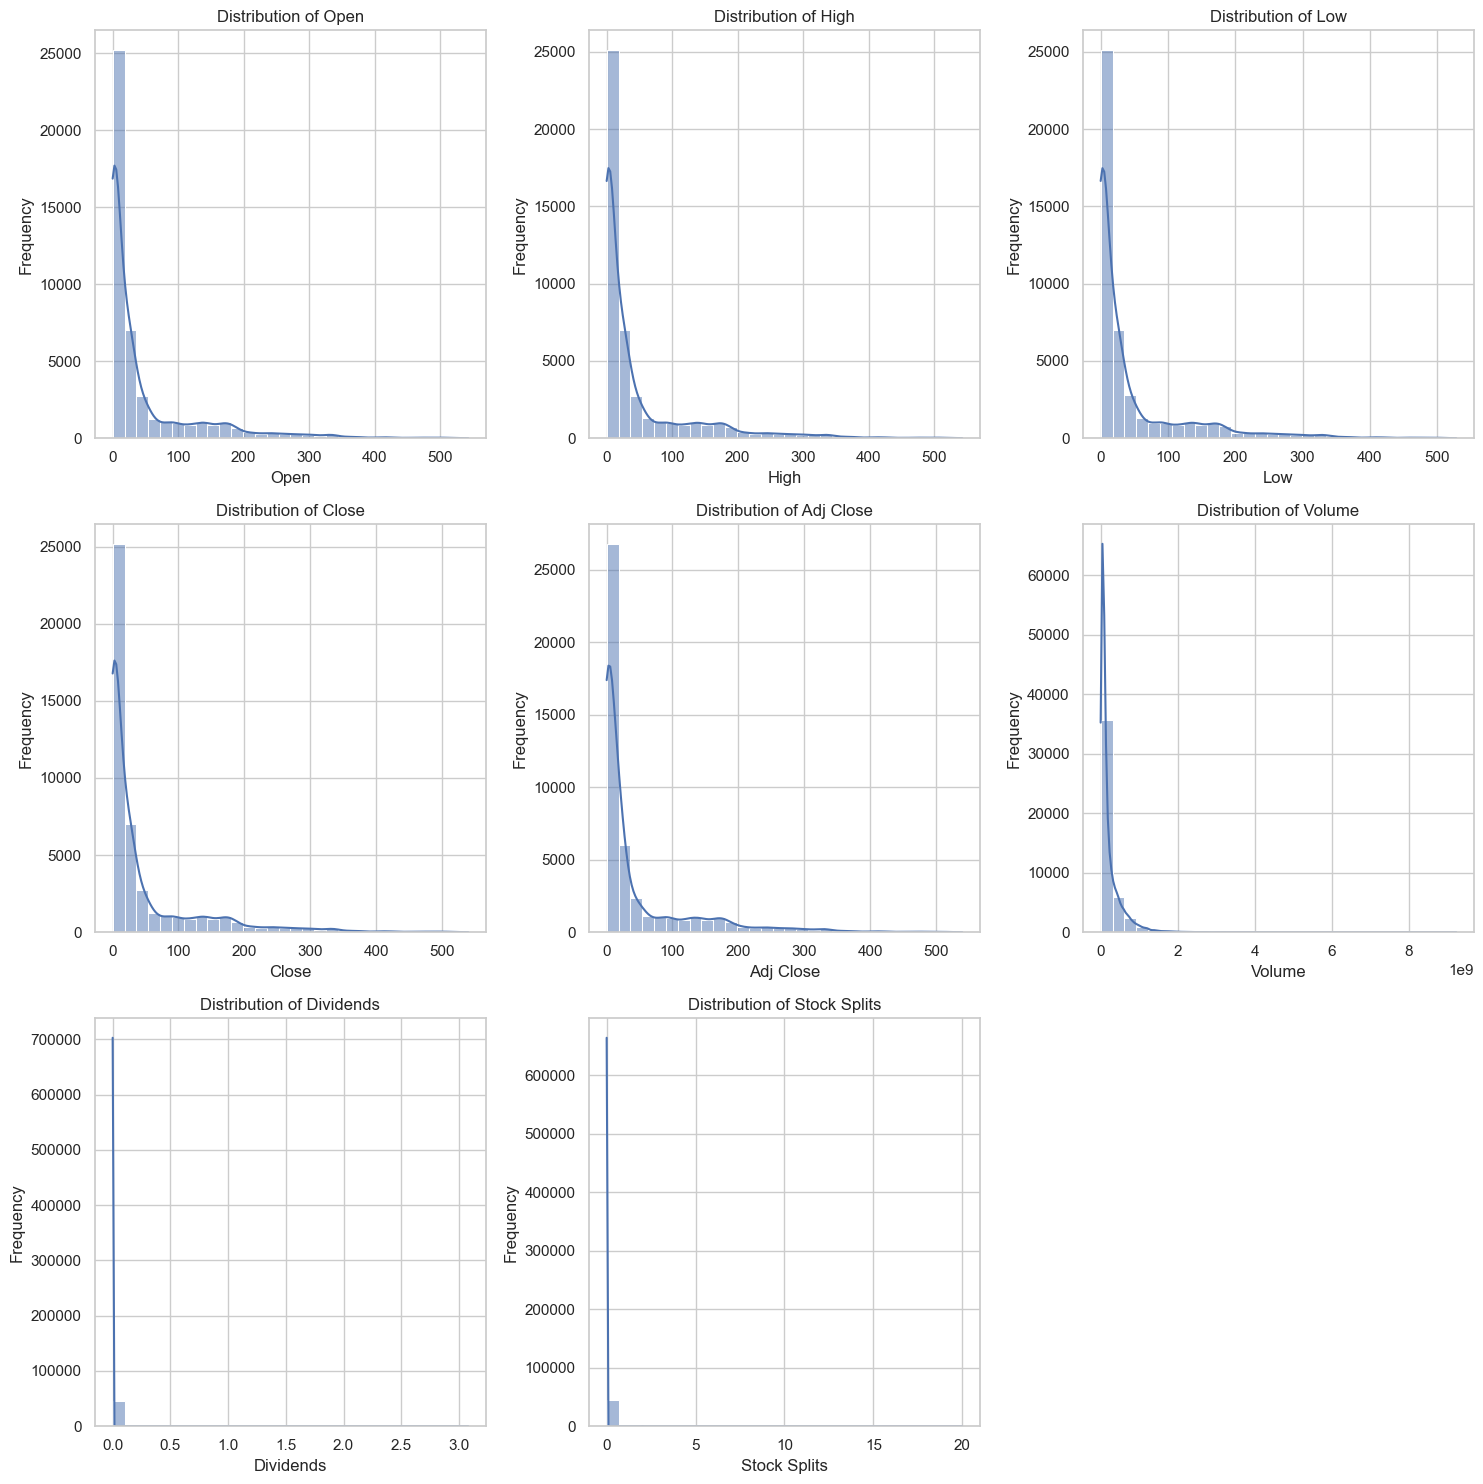

In [8]:
#Univariate Analysis for Numerical Columns Distribution
stock_price.univariate_num()

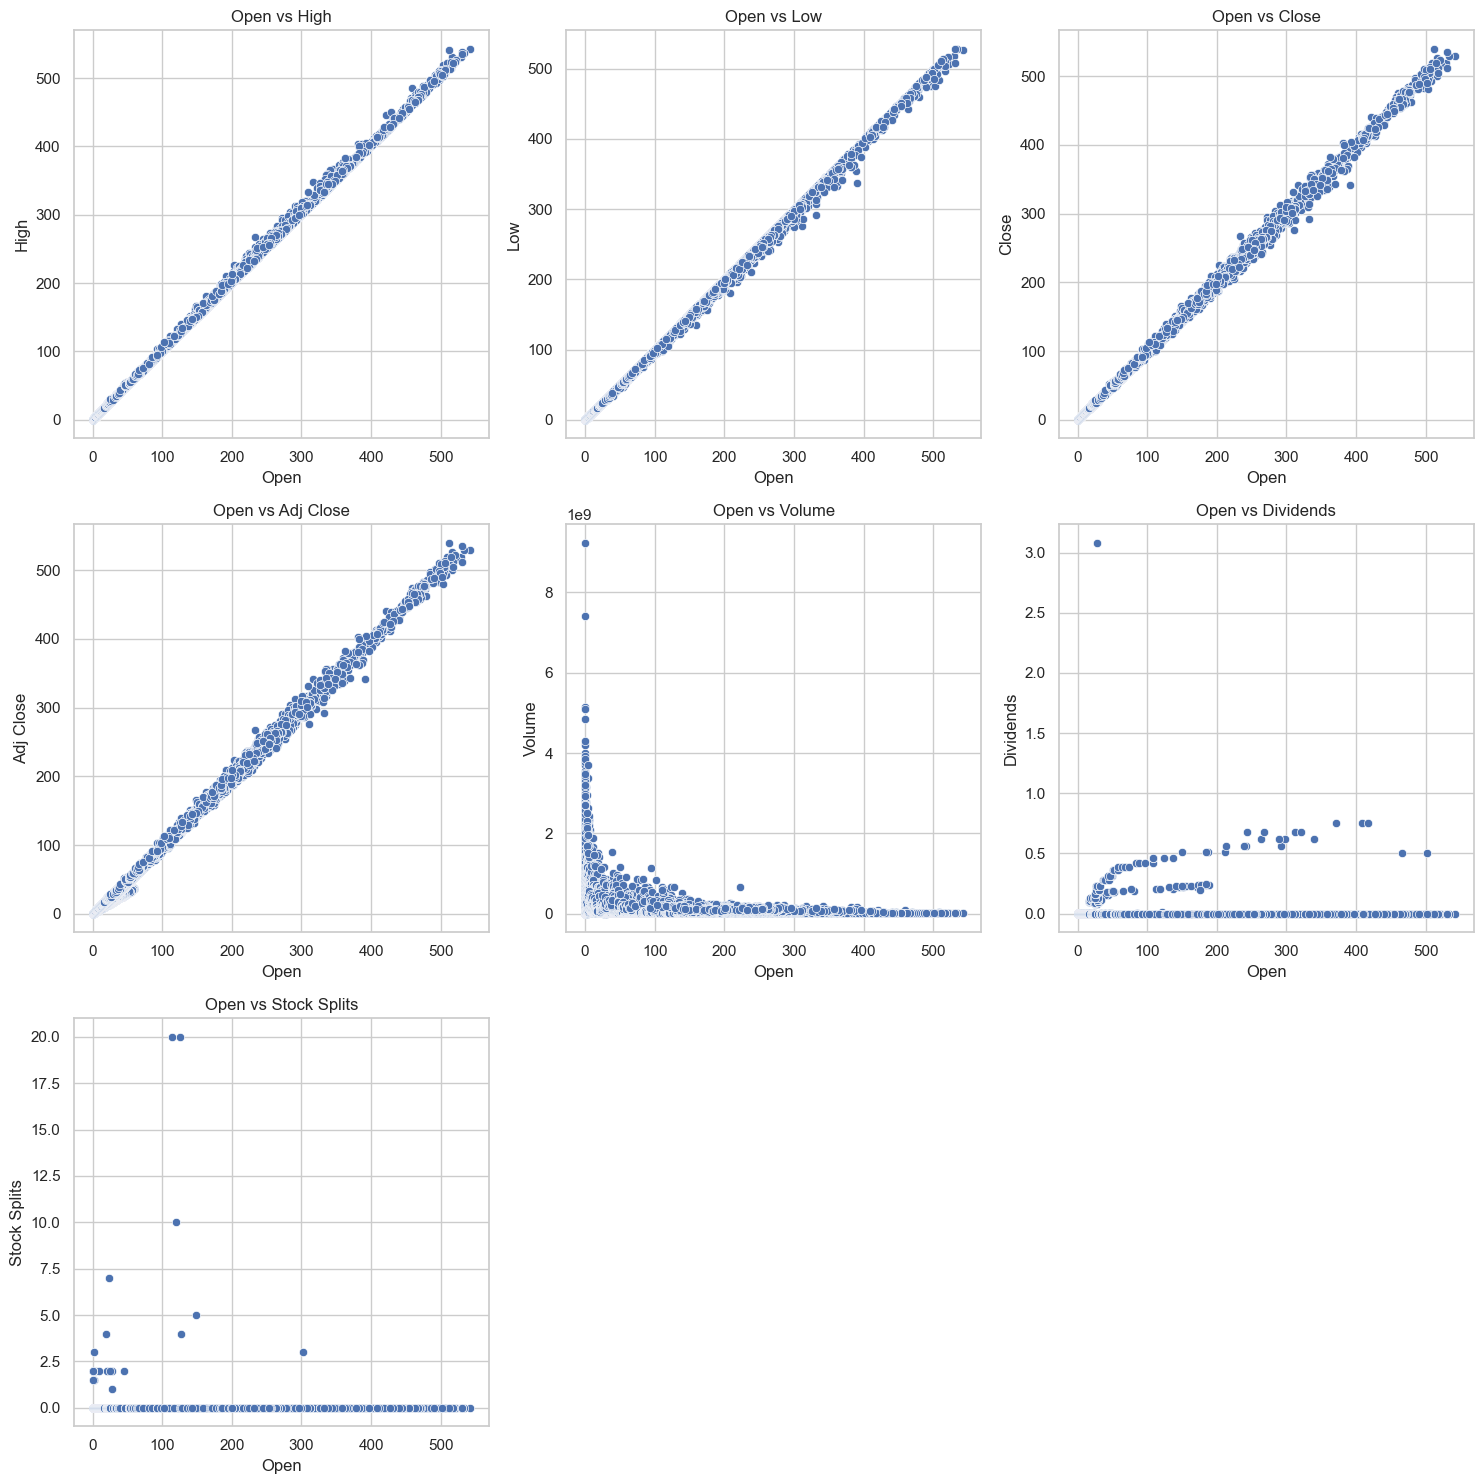

In [23]:
# Bivariate Analysis for Numerical vs Numerical (Scatterplots)
stock_price.bivariate_num()

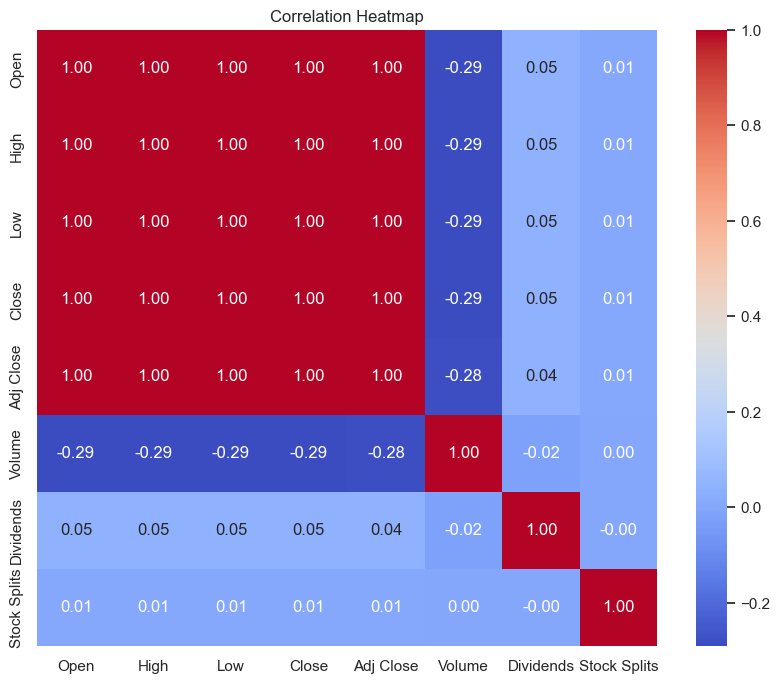

In [24]:
# Correlation Analysis Using Heatmap of Correlation Matrix
stock_price.correlation_analysis()

In [9]:
# Initialize the TimeSeries class with your dataframe
finan_data = FinancialAnalysis(merged_df)

In [10]:
finan_data.calculate_indicators()

# Print the results
print(finan_data.df.head(15))

          Date      Open      High       Low     Close  Adj Close     Volume  \
0   1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1   1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2   1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3   1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4   1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   
5   1980-12-19  0.126116  0.126674  0.126116  0.126116   0.097223   48630400   
6   1980-12-22  0.132254  0.132813  0.132254  0.132254   0.101954   37363200   
7   1980-12-23  0.137835  0.138393  0.137835  0.137835   0.106257   46950400   
8   1980-12-24  0.145089  0.145647  0.145089  0.145089   0.111849   48003200   
9   1980-12-26  0.158482  0.159040  0.158482  0.158482   0.122173   55574400   
10  1980-12-29  0.160714  0.161272  0.160714  0.160714   0.123894   93161600   
11  1980-12-30  0.157366  0.157366  0.15

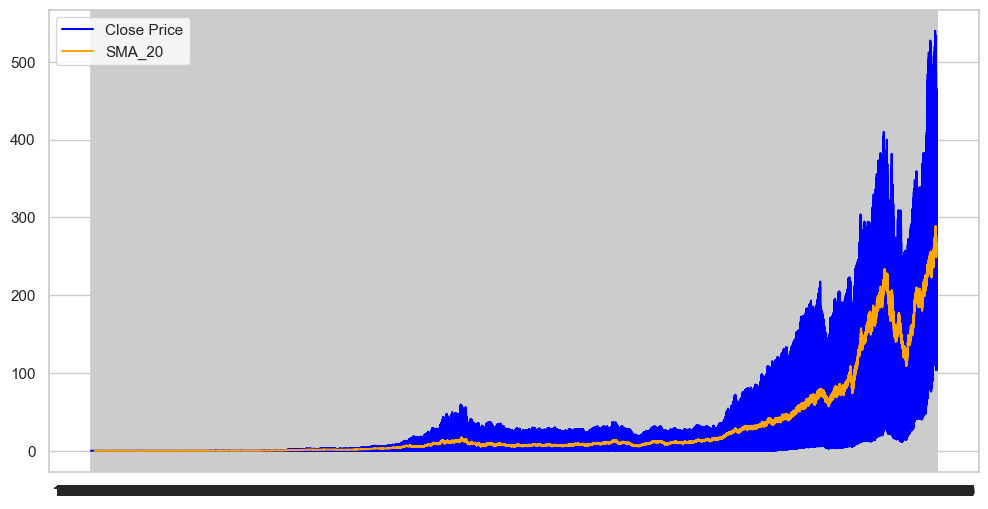

In [11]:
#SMA vs. Closing Price:
#Compare the SMA_20 with the Close price to identify trends.
finan_data.visualize_SMA()

RSI:
    Plot RSI to see overbought/oversold levels (usually RSI > 70 = overbought, RSI < 30 = oversold).

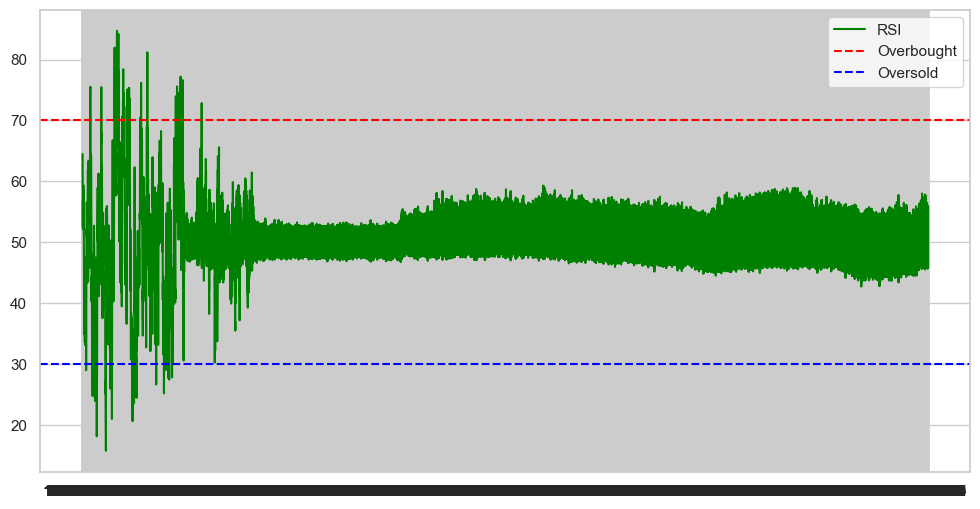

In [8]:
finan_data.visualize_RSI()

MACD:
    Plot MACD, signal line, and histogram to identify bullish/bearish momentum.

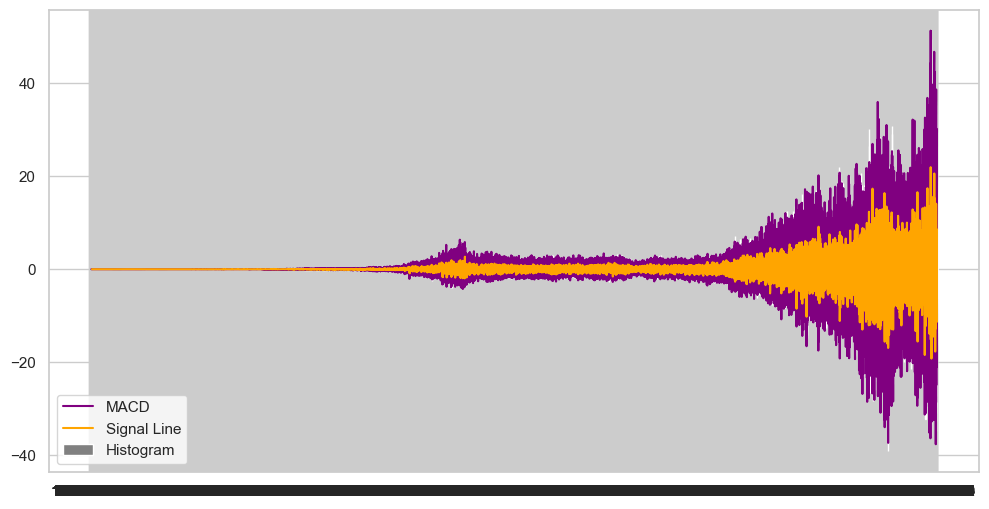

In [9]:
finan_data.visualize_MACD()

# Task Three
To align the news dataset (Task 1) with the stock price dataset (Task 2), we'll perform date alignment by ensuring both datasets share a common date format and are normalized to align timestamps.

In [12]:
# Convert date columns to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce') # news_data
merged_df['date'] = pd.to_datetime(merged_df['Date'], errors='coerce') # stock_data


In [13]:
# Normalize timestamps to only keep the date (no time)
df['date'] = df['date'].dt.date   # news_data
merged_df['date'] = merged_df['date'].dt.date  # stock_data

In [14]:
# Merge the two datasets on the date column
aligned_data = pd.merge(df, merged_df, on='date', how='inner')
aligned_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,Neutral,2020-06-05,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0
1,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,Neutral,2020-06-05,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0
2,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,Neutral,2020-06-05,70.658501,72.252502,70.300003,71.919502,71.837753,34698000,0.0,0.0
3,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,Neutral,2020-06-05,226.710007,231.350006,225.309998,230.770004,230.296753,16750400,0.0,0.0
4,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,Neutral,2020-06-05,182.619995,187.729996,182.009995,187.199997,180.403564,39893600,0.0,0.0


## Add Sentiment Column

In [15]:
# Add a sentiment column to the merged dataset
aligned_data['sentiment'] = aligned_data['headline'].apply(get_sentiment)

# Count sentiment categories
sentiment_counts = aligned_data['sentiment'].value_counts()


In [23]:
aligned_data.head()

,headline,url,publisher,date,stock,headline_length,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,39,Neutral,2020-06-05,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0
1,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,39,Neutral,2020-06-05,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0
2,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,39,Neutral,2020-06-05,70.658501,72.252502,70.300003,71.919502,71.837753,34698000,0.0,0.0
3,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,39,Neutral,2020-06-05,226.710007,231.350006,225.309998,230.770004,230.296753,16750400,0.0,0.0
4,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,39,Neutral,2020-06-05,182.619995,187.729996,182.009995,187.199997,180.403564,39893600,0.0,0.0


In [16]:
# Call the functions
merged_plot = EDA(aligned_data)

c:\Users\Specter\Documents\Stoke_market_prediction_w1\scripts\Data_visulization.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


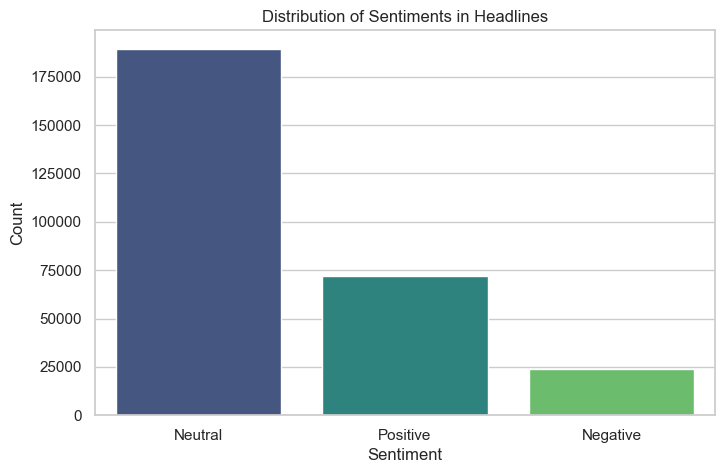

In [26]:
# Python Code for Visualization
    # Sentiment distribution visualization
merged_plot.plot_sentiment_distribution()

c:\Users\Specter\Documents\Stoke_market_prediction_w1\scripts\Data_visulization.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


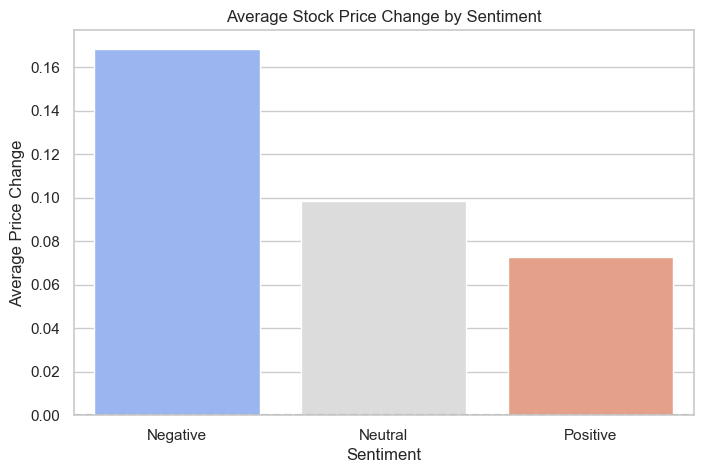

In [27]:
merged_plot.plot_price_changes()

# Daily Percentage Change:
## pct_change() computes the relative change between consecutive rows.
### Multiply by 100 to express it as a percentage.

In [17]:
# Sort by date to ensure the correct calculation order
aligned_data = aligned_data.sort_values(by='date')


In [18]:
# Calculate daily returns as a percentage
aligned_data['daily_return'] = aligned_data['Close'].pct_change() * 100

# Display the first few rows of the updated dataset
print(aligned_data[['date', 'Close', 'daily_return']].head())

             date      Close  daily_return
93016  2011-04-27   9.831500           NaN
93020  2011-04-27   1.805333    -81.637258
93019  2011-04-27   0.482500    -73.273630
93018  2011-04-27  26.379999   5367.357488
93017  2011-04-27  13.393797    -49.227455


In [19]:
# Categorize daily returns
def categorize_return(value):
    if value > 0:
        return "Above 0"
    elif value < 0:
        return "Below 0"
    else:
        return "0"

In [20]:
aligned_data['return_category'] = aligned_data['daily_return'].apply(categorize_return)

# Count the values for each category
return_counts = aligned_data['return_category'].value_counts()
print(return_counts)


return_category
Below 0    132255
Above 0    132091
0           20682
Name: count, dtype: int64


In [21]:
# Call the functions
catego_plot = EDA(return_counts)

# Use a custom function (categorize_return) to classify daily returns into:
"Above 0": Positive daily returns.
"0": No change in closing price.
"Below 0": Negative daily returns.


c:\Users\Specter\Documents\Stoke_market_prediction_w1\scripts\Data_visulization.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=self.dataframe.index, y=self.dataframe.values, palette="coolwarm")


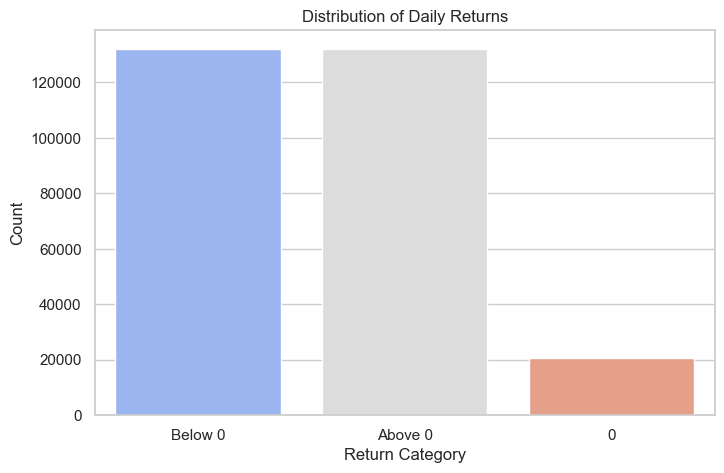

In [22]:
catego_plot.plot_category()

# Calculate Stock Movements
## Correlation Between Daily News Sentiment Scores and Stock Returns

I Used statistical methods like Pearson or Spearman correlation to measure the relationship between aggregated sentiment scores and stock returns.

Pearson Correlation: -0.0084 (p-value: 3.4411e-02)


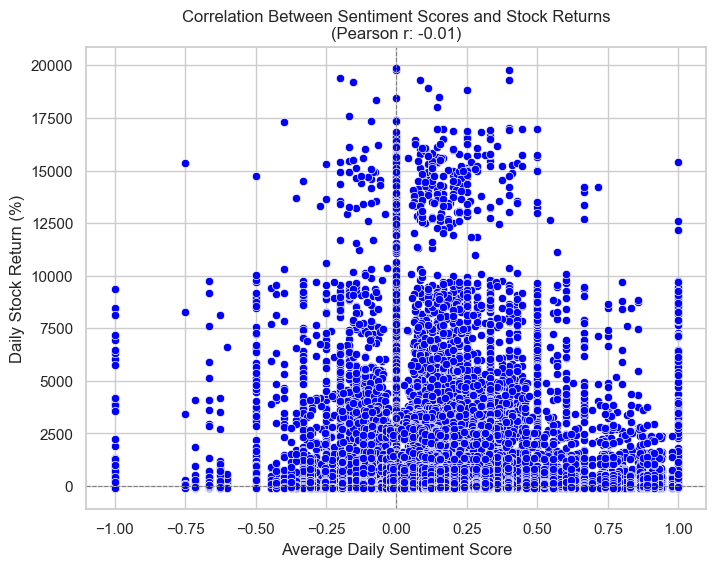

In [35]:
# Call the functions
correlation_plot = FinancialAnalysis(aligned_data)

correlation_plot.Correlation_news_stock()

Spearman Correlation: -0.0003 (p-value: 8.5766e-01)


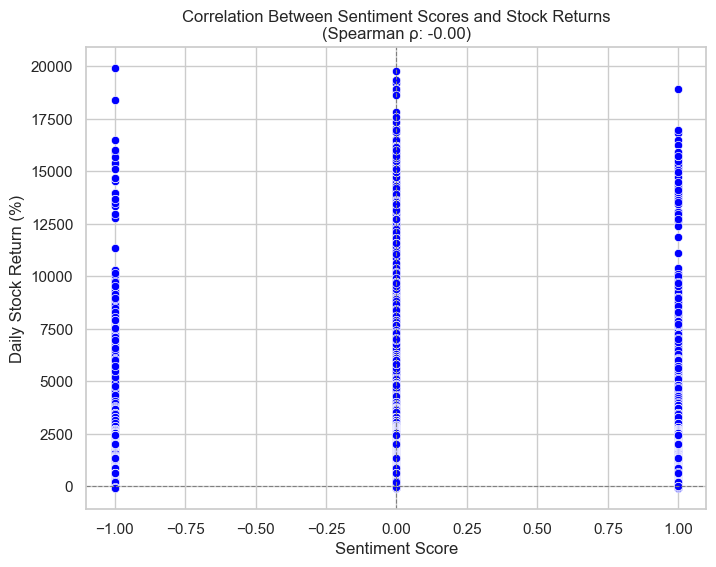

In [23]:
# Call the functions of Spearman correlation Plot
correlation_plot = FinancialAnalysis(aligned_data)

correlation_plot.Spearman_Corr_news_stock()

In [24]:
# Calculate Stock Movements

# Calculate daily returns
aligned_data['daily_return'] = aligned_data['Close'].pct_change() * 100  # Percentage changes

# Handle NaN values
aligned_data.dropna(subset=['daily_return'], inplace=True)

# Display the first few rows
print(aligned_data[['Date', 'Close', 'daily_return']].head())

             Date      Close  daily_return
93019  2011-04-27   0.482500    -73.273630
93018  2011-04-27  26.379999   5367.357488
93017  2011-04-27  13.393797    -49.227455
93015  2011-04-27  12.505357     -6.633221
91401  2011-04-28   0.487750    -96.099672


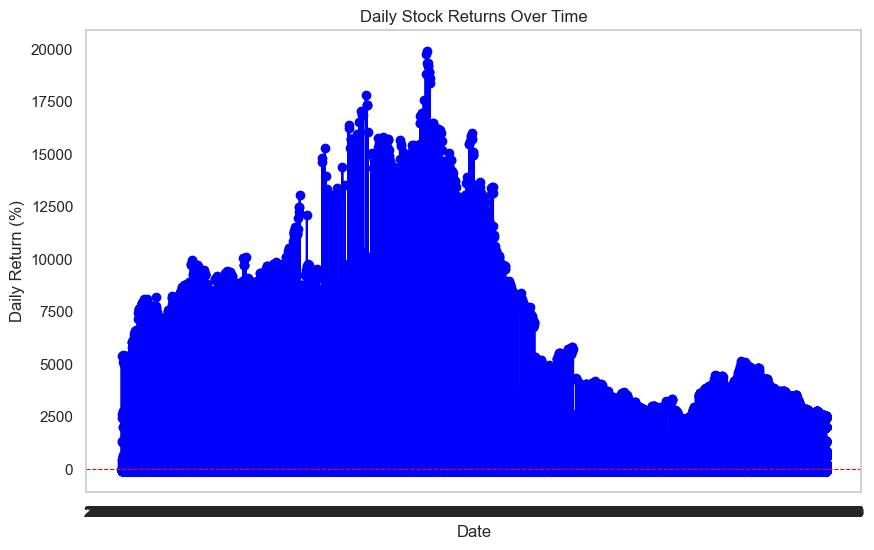

In [25]:
import matplotlib.pyplot as plt

# Plot daily returns
plt.figure(figsize=(10, 6))
plt.plot(aligned_data['Date'], aligned_data['daily_return'], marker='o', linestyle='-', color='blue')
plt.title("Daily Stock Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.grid()
plt.show()

# Compute average daily sentiment scores

In [26]:
# Ensure the dataset has a 'Date' and 'sentiment_score' column
if 'Date' not in aligned_data.columns or 'sentiment_score' not in aligned_data.columns:
    raise KeyError("The dataset must have 'Date' and 'sentiment_score' columns.")

# Convert 'Date' to a datetime object (if not already done)
aligned_data['Date'] = pd.to_datetime(aligned_data['Date'])

# Group by Date and compute the average sentiment score
average_daily_sentiment = (
    aligned_data.groupby('Date')['sentiment_score']
    .mean()
    .reset_index()
    .rename(columns={'sentiment_score': 'avg_sentiment_score'})
)

# Display the result
print(average_daily_sentiment.head(10))

        Date  avg_sentiment_score
0 2011-04-27             0.000000
1 2011-04-28             0.500000
2 2011-04-29             0.000000
3 2011-05-02             0.000000
4 2011-05-03             0.000000
5 2011-05-05             0.000000
6 2011-05-06             0.500000
7 2011-05-09             0.333333
8 2011-05-11             0.000000
9 2011-05-12             1.000000


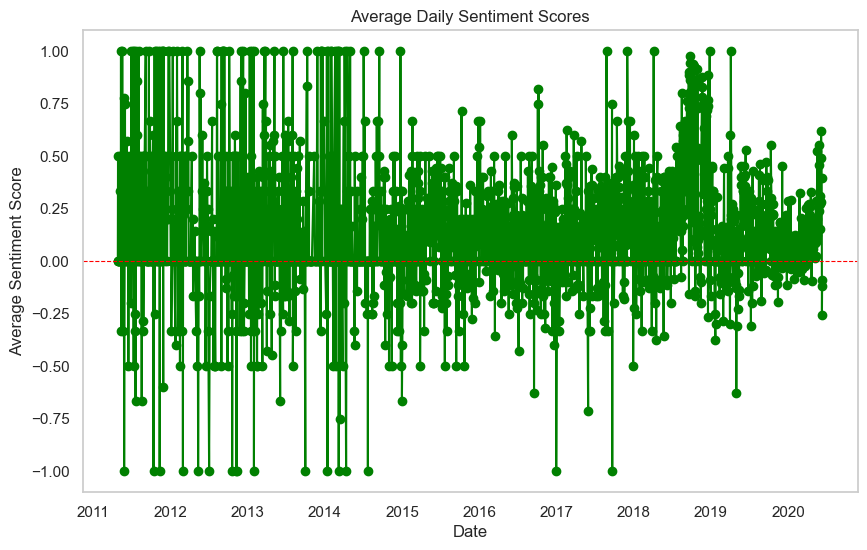

In [42]:
#To visualize daily sentiment scores:


import matplotlib.pyplot as plt

# Plot average daily sentiment scores
plt.figure(figsize=(10, 6))
plt.plot(average_daily_sentiment['Date'], average_daily_sentiment['avg_sentiment_score'], marker='o', linestyle='-', color='green')
plt.title("Average Daily Sentiment Scores")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.grid()
plt.show()

# Pearson correlation coefficient between average daily sentiment scores and stock daily returns

In [27]:
 #Merge average sentiment scores with stock daily returns on 'Date'
from scipy.stats import pearsonr
merged_data1 = pd.merge(
    average_daily_sentiment,
    aligned_data[['Date', 'daily_return']],
    on='Date',
    how='inner'
)

# Check for missing values
merged_data1.dropna(subset=['avg_sentiment_score', 'daily_return'], inplace=True)

# Calculate Pearson correlation
correlation, p_value = pearsonr(merged_data1['avg_sentiment_score'], merged_data1['daily_return'])

# Display the result
print(f"Pearson Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4e}")

# Optional: Display merged data
print(merged_data1.head())

Pearson Correlation Coefficient: -0.0220
P-value: 6.3401e-32
        Date  avg_sentiment_score  daily_return
0 2011-04-27                  0.0    -73.273630
1 2011-04-27                  0.0   5367.357488
2 2011-04-27                  0.0    -49.227455
3 2011-04-27                  0.0     -6.633221
4 2011-04-28                  0.5    -96.099672


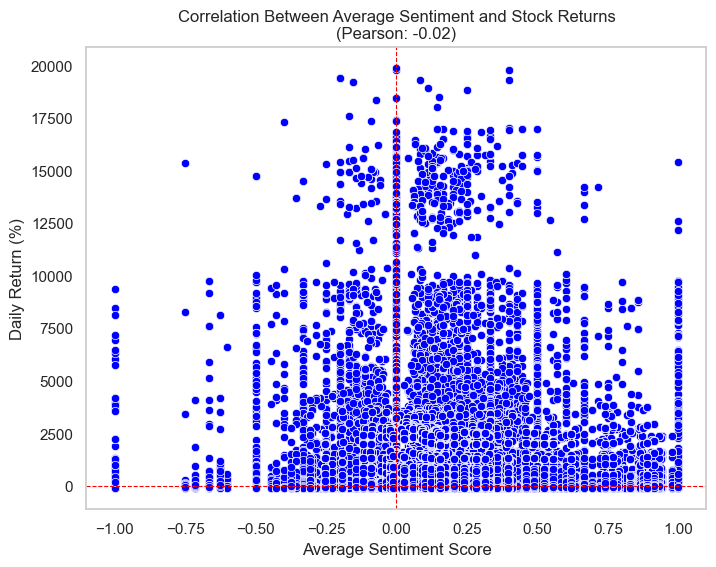

In [45]:
# Scatter plot
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=merged_data1,
    x='avg_sentiment_score',
    y='daily_return',
    color='blue'
)
plt.title(f"Correlation Between Average Sentiment and Stock Returns\n(Pearson: {correlation:.2f})")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Daily Return (%)")
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.axvline(0, color='red', linestyle='--', linewidth=0.8)
plt.grid()
plt.show()